In [1]:
from itertools import count
from re import search

from matplotlib.pyplot import spring

from aoc import *
from copy import deepcopy
from collections import defaultdict, Counter, deque
import re
from tqdm import tqdm
import itertools
from datetime import datetime

year = datetime.now().year
day = datetime.now().day

if not os.path.exists("inputs"):
    os.mkdir("inputs")

if not os.path.exists(f"inputs/day_{day}_input.txt"):
    download_input(year, day)

aoc, lines, G, R, C = read_input(day, test=False)

lines[:5]=['the: taq aki', 'fnc: shq dvj nhp ule', 'eub: pxs you apo', 'fde: out', 'bsp: shq dvj nhp']
R=575, C=12


In [2]:
aoc, lines, G, R, C = read_input(day, test=False)

nodes = []
edges = defaultdict(list)

for line in lines:
    node, edges_l = line.split(":")
    these_edges = edges_l.split()
    nodes.append(node)
    edges[node].extend(these_edges)

start = "you"
Q = deque([list([start])])
paths = 0

while len(Q) > 0:
    p = Q.popleft()
    #print(p)
    if p[-1] == "out":
        paths+=1
    else:
        #print(p[-1])
        #print(edges)
        for e in edges[p[-1]]:
            if e not in p:
                Q.append(p+[e])

print(paths)




lines[:5]=['the: taq aki', 'fnc: shq dvj nhp ule', 'eub: pxs you apo', 'fde: out', 'bsp: shq dvj nhp']
R=575, C=12
708


DiGraph with 576 nodes and 1663 edges
True


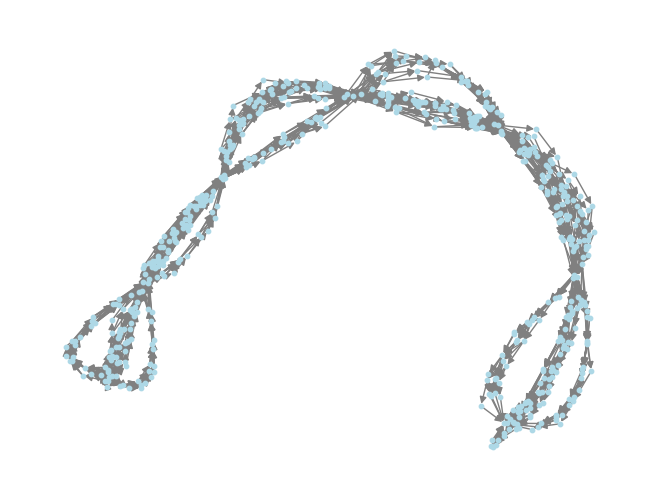

In [44]:
import networkx as nx

G = nx.DiGraph()
edges = defaultdict(list)

for line in lines:
    node, edges_l = line.split(":")
    these_edges = edges_l.split()
    for e in these_edges:
        G.add_edge(node, e)

print(G)
print(nx.is_directed_acyclic_graph(G))
import matplotlib.pyplot as plt

nx.draw(G, with_labels=False, node_color='lightblue', edge_color='gray', node_size=10)
plt.show()


In [58]:
aoc, lines, G, R, C = read_input(day, test=False)

nodes = []
edges = defaultdict(list)

for line in lines:
    node, edges_l = line.split(":")
    these_edges = edges_l.split()
    nodes.append(node)
    edges[node].extend(these_edges)

from functools import cache

@cache
def paths_from_a_to_b(a,b):
    if a == b:
        return 0
    if b in edges[a]:
        return 1
    else:
        return sum([paths_from_a_to_b(x,b) for x in edges[a]])

r1_leg1 = paths_from_a_to_b("svr","dac")
r1_leg2 = paths_from_a_to_b("dac","fft")
r1_leg3 = paths_from_a_to_b("fft","out")

r2_leg1 = paths_from_a_to_b("svr","fft")
r2_leg2 = paths_from_a_to_b("fft","dac")
r2_leg3 = paths_from_a_to_b("dac","out")

print(r1_leg1,r1_leg2,r1_leg3,r2_leg1,r2_leg2,r2_leg3)
print(r1_leg1*r1_leg2*r1_leg3+r2_leg1*r2_leg2*r2_leg3)

lines[:5]=['the: taq aki', 'fnc: shq dvj nhp ule', 'eub: pxs you apo', 'fde: out', 'bsp: shq dvj nhp']
R=575, C=12
2438626827156 0 2305764038056 5477 20531772 4850
545394698933400
